**GROUP NAME:** MI4

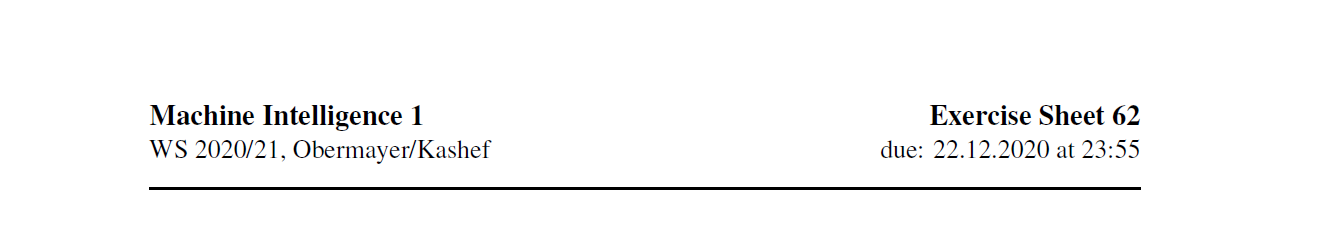

In [ ]:
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import  Input, Dense, LSTM
from keras.optimizers import Adam

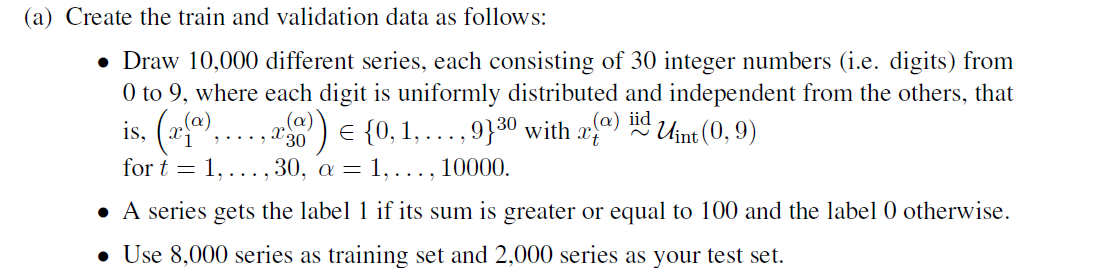

In [ ]:
X = np.random.randint(0, 9, size = [10000, 30, 1])
y = np.asarray([1 if np.sum(i)>=100 else 0 for i in X])
y = y.reshape((10000, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

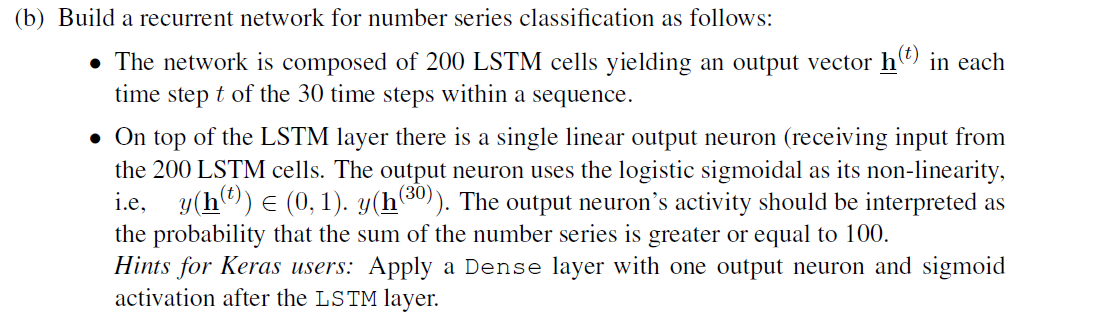

In [ ]:
model = Sequential()  
model.add(LSTM(200, input_shape=(30, 1), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

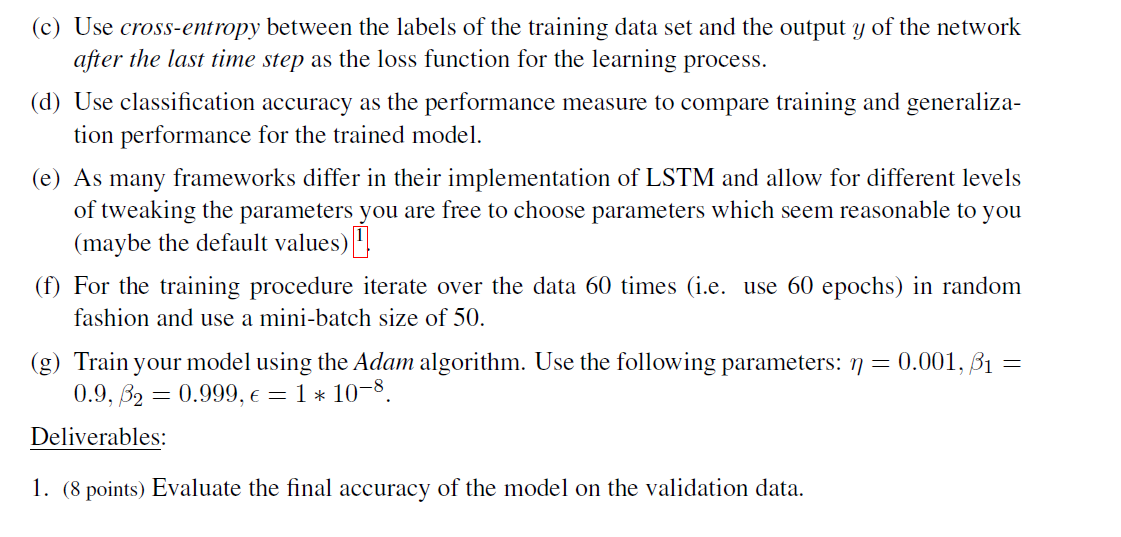

In [ ]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1*10**(-8))
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=50, epochs=60, verbose=1, validation_split=0.1, shuffle= True)

Epoch 1/60
144/144 [==============================] - 11s 66ms/step - loss: 0.2622 - accuracy: 0.8978 - val_loss: 0.1123 - val_accuracy: 0.9438
Epoch 2/60
144/144 [==============================] - 9s 61ms/step - loss: 0.1315 - accuracy: 0.9459 - val_loss: 0.0785 - val_accuracy: 0.9638
Epoch 3/60
144/144 [==============================] - 9s 62ms/step - loss: 0.0756 - accuracy: 0.9696 - val_loss: 0.0586 - val_accuracy: 0.9825
Epoch 4/60
144/144 [==============================] - 9s 63ms/step - loss: 0.0865 - accuracy: 0.9642 - val_loss: 0.0548 - val_accuracy: 0.9887
Epoch 5/60
144/144 [==============================] - 9s 64ms/step - loss: 0.0582 - accuracy: 0.9777 - val_loss: 0.0464 - val_accuracy: 0.9887
Epoch 6/60
144/144 [==============================] - 9s 65ms/step - loss: 0.0571 - accuracy: 0.9785 - val_loss: 0.0530 - val_accuracy: 0.9737
Epoch 7/60
144/144 [==============================] - 9s 64ms/step - loss: 0.0528 - accuracy: 0.9775 - val_loss: 0.0389 - val_accuracy: 0.988

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1, batch_size=50)
print('Accurracy: {}'.format(scores[1]))

40/40 [==============================] - 1s 22ms/step - loss: 0.0186 - accuracy: 0.9920
Accurracy: 0.9919999837875366


In [ ]:
y_pred = model.predict(X_test).round()
cf_matrix = confusion_matrix(y_test, y_pred)

[[ 181    2]
 [  14 1803]]


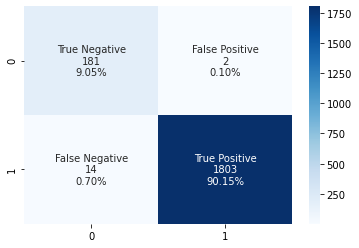

In [ ]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

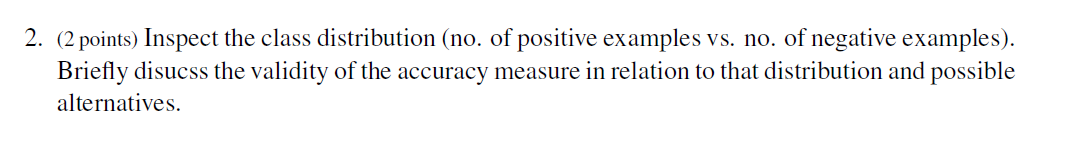

The class distribution is skewed toward number of positives. (number of ones is higher)

The acurracy measure which is used in the above steps shows the performance of the model based on the number of correct classifications. As the distribution is skewed toward one type of class (around 91 percent of the datapoints belong to one class), its better to know how well the model performs in terms of false negatives and false positives. This gives the idea of the model performance within each class.

So an alternative would be using confusion matrix as shown above.